# Análisis exploratorio
En este primer jupyter notebook exploraremos los datos de la competencia de Kaggle [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview).
Aplicaremos las herramientas que vimos a lo largo del módulo y seguiremos un órden lógico para explorar los datos y reforzar los conocimientos aprendidos.

Este notebook servirá como guía para la entrega del proyecto integrador para éste módulo.

Veremos los siguientes pasos:
1. Exploraremos la forma de los datos y los tipos de datos
2. Calcularemos medidas de tendencia central para describir las variables
3. Usaremos la descripción del conjunto de datos para determinar relaciones importantes entre las variables

# Información sobre el conjunto de datos
De la página de Kaggle obtenemos la siguiente información sobre el conjunto de datos que estaremos analizando.
### El reto
El hundimiento del Titanic es probablemente el más famoso de la historia.
El 15 de Abril de 1912 en su viaje inaugural se hundió después de chocar con un iceberg. Desafortunadamente no había suficientes botes salvavidas para todas las personas a bordo resultando en la muerte de 1502 de 2224 personas entre pasajeros y tripulación.
La supervivencia de los tripulantes en cierta medida fue determinada por la suerte pero parece que hay ciertos grupos de personas que tenían mayor probabilidad de sobrevivir.

En este notebook buscaremos analizar qué personas tenían mayor probabilidad de sobrevivir. Usaremos los datos de los pasajeros (nombre, edad, sexo, ...) para intentar determinarlo.
En la tabla siguiente se encuentra una descripción breve de las columnas de nuestros datos extraída de la página de Kaggle .


| Variable | Definition                                 | Key                                      |
|----------|--------------------------------------------|------------------------------------------|
| survival | Survival                                   | 0=No, 1=Yes                              |
| pclass   | Ticket class                               | 1=1st, 2=2nd, 3=3rd                      |
| sex      | Sex                                        |                                          |
| Age      | Age in years                               |                                          |
| sibsp    | # of siblings / spouses aboard the Titanic |                                          |
| parch    | # of parents / children aboard the Titanic |                                          |
| ticket   | Ticket number                              |                                          |
| fare     | Passenger Fare                             |                                          |
| cabin    | Cabin number                               |                                          |
| ebarked  | Port of Embarkation                        | C=Cherbourg, Q=Quennstown, S=Southampton |
```
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```

## 1. Análisis exploratorio
Usaremos las herramientas que aprendimos en los módulos pasados para comenzar a aprender qué hay en los datos.


Exploremos las columnas, comencemos a ver qué hay en el conjunto de datos y veamos los tipos de dato con los que contamos

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# cargar los datos
# cargaremos los datos de un archivo csv
# Este archivo debe estar en la misma carpeta del notebook.
# Si se encuentra en otra carpeta podemos especificar la ruta.
data=pd.read_csv('titanic_train.csv')


## Forma y tipo de los datos

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.select_dtypes(include='int64')

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [11]:
data.select_dtypes(include='float64')

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [12]:
data.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


### Medidas de tendencia central y dispersión

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploración de las variables
Comencemos a explorar las variables mas a profundidar para conocer con qué estamos lidiando.

### PassengerID
Es el id del pasajero revisaremos si hay duplicados para saber con qué datos tenemos que lidiar.

In [15]:
# no hay duplicados
data.PassengerId.duplicated().any()

False

### Survived
Contiene la información de si el pasajero sobrevivió o no. 

In [16]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
data.Survived.mean()

0.3838383838383838

In [18]:
data.Survived.sum()/data.Survived.count()

0.3838383838383838

In [19]:
data.Survived.value_counts()/data.Survived.count()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Pclass

In [20]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
data.Pclass.value_counts()/data.Survived.count()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

### Age

In [22]:
data.Age.describe(percentiles=[0.05, 0.95])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
50%       28.000000
95%       56.000000
max       80.000000
Name: Age, dtype: float64

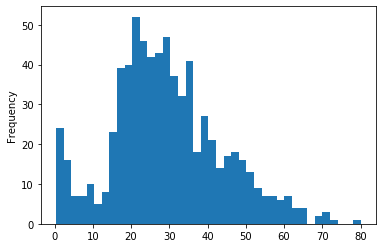

In [23]:
data.Age.plot(kind='hist', bins=40)

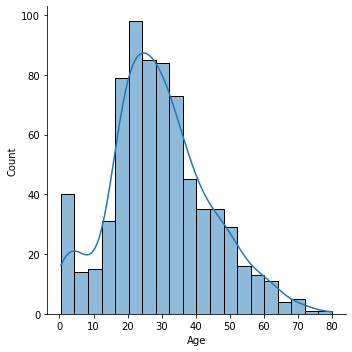

In [24]:
sns.displot(data=data, x='Age', kde=True)

### Sibsp, Parch

```
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```

In [25]:
cols = ['SibSp', 'Parch']
data[['SibSp', 'Parch']].sample(5)

,SibSp,Parch
753,0,0
838,0,0
560,0,0
575,0,0
95,0,0


In [26]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [27]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
data[cols].value_counts().head(10)

SibSp  Parch
0      0        537
1      0        123
       1         57
0      1         38
       2         29
1      2         19
2      0         16
4      2          9
       1          9
3      2          7
dtype: int64

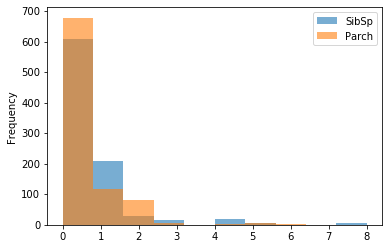

In [29]:
data[cols].plot(kind='hist', alpha=0.6, bins=10)

### Fare
La tarifa que pagaron

In [30]:
data.Fare.describe(percentiles=[0.05, 0.95])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
50%       14.454200
95%      112.079150
max      512.329200
Name: Fare, dtype: float64

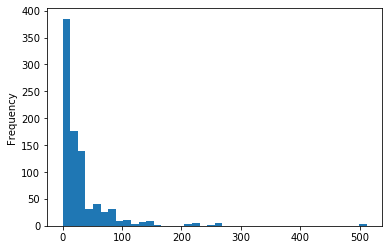

In [31]:
data.Fare.plot(kind='hist', bins=40)

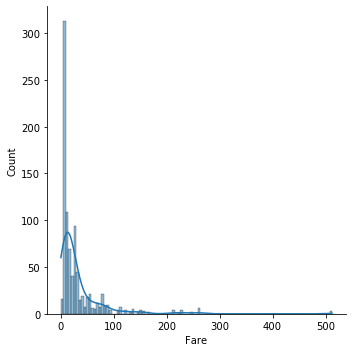

In [32]:
sns.displot(data=data, x='Fare', kde=True)

### Name
Contiene el nombre

In [33]:
# Una muestra aleatoria de 5 nombres
data.Name.sample(5)

416    Drew, Mrs. James Vivian (Lulu Thorne Christian)
569                                  Jonsson, Mr. Carl
886                              Montvila, Rev. Juozas
852                            Boulos, Miss. Nourelain
479                           Hirvonen, Miss. Hildur E
Name: Name, dtype: object

In [34]:
# Los nombres están separados por una coma, eso nos puede ser de utilidad después
#  podmeos separar los componentes del nombre con la función split.
data.Name.sample(5).str.split(',')

16                               [Rice,  Master. Eugene]
615                               [Herman,  Miss. Alice]
444                 [Johannesen-Bratthammer,  Mr. Bernt]
537                               [LeRoy,  Miss. Bertha]
8      [Johnson,  Mrs. Oscar W (Elisabeth Vilhelmina ...
Name: Name, dtype: object

### Cabin
tenemos muchos nulos en esta columna, no parece que nos vaya a ayudar esta columna.

In [35]:
data.Cabin.isna().sum()

687

In [36]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

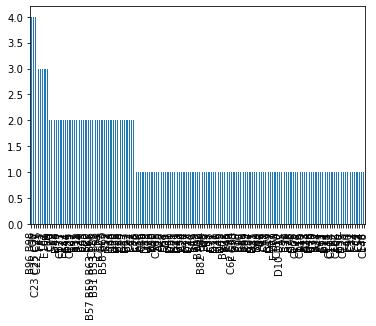

In [37]:
data.Cabin.value_counts().plot(kind='bar')

### Embarked
La plataforma desde la que se embarcaron

In [38]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Sex

In [39]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
# porcentaje
data.Sex.value_counts()/data.Sex.count()

male      0.647587
female    0.352413
Name: Sex, dtype: float64

## Dispersión
Analicemos la dispersión de algunas variables

In [41]:
data.Fare.describe(percentiles=[0.01, 0.05, .25, .75, 0.95, 0.99])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
1%         0.000000
5%         7.225000
25%        7.910400
50%       14.454200
75%       31.000000
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

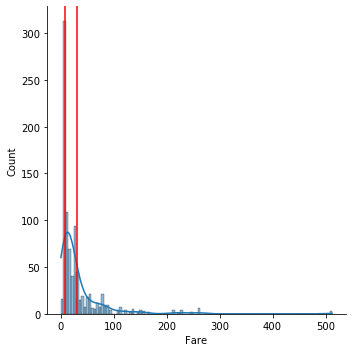

In [42]:
sns.displot(data=data, x='Fare', kde=True)
plt.axvline(np.quantile(a=data.Fare, q=0.25), color='r')
plt.axvline(np.quantile(a=data.Fare, q=0.75), color='r')

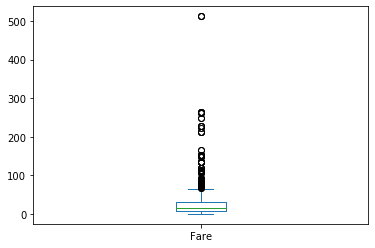

In [43]:
data.Fare.plot(kind='box')

In [44]:
data.Age.describe(percentiles=[0.01, 0.05, .25, .75, 0.95, 0.99])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
1%         1.000000
5%         4.000000
25%       20.125000
50%       28.000000
75%       38.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64

In [45]:
np.nanquantile(a=data.Age, q=0.25)

20.125

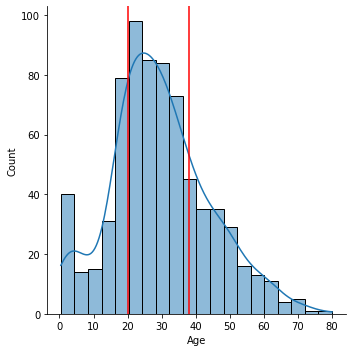

In [46]:
sns.displot(data=data, x='Age', kde=True)
plt.axvline(np.nanquantile(a=data.Age, q=0.25), color='r')
plt.axvline(np.nanquantile(a=data.Age, q=0.75), color='r')

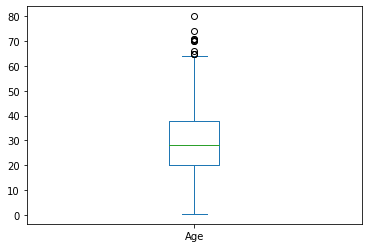

In [47]:
data.Age.plot(kind='box')

Como ejercicio normalicemos la variable de edad y comparémosla con la distribución normal.

In [48]:
age_normalizada = (data.Age - data.Age.mean())/data.Age.std()

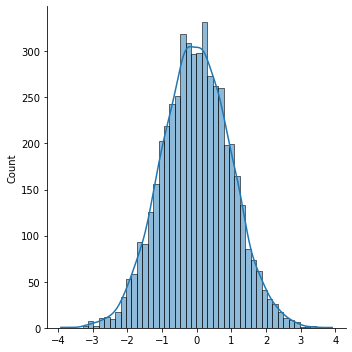

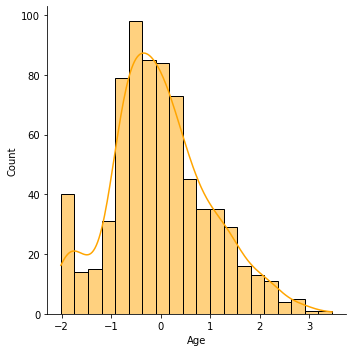

In [49]:
#creamos una gráfica de distribución normal
# obtengamos una muestra aleatoria de una distribución normal
normal_sample = np.random.normal(size=5000)
sns.displot(x=normal_sample, kde=True)
sns.displot(x=age_normalizada, kde=True, color='orange')


---